In [1]:
from args_experiments import *
from models import *
from load_data import *
from training import *
from utils import *

import random
import os
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

In [2]:
args = args_cmapss()
args_encoder = args_seq2graph()
print(args)
print(args_encoder)

Namespace(batch_size=128, cuda=True, device=device(type='cuda'), epochs_adam=1000, hidden_GC=[4, 4], lag=2, lmbd_prox=0.005, lmbd_ridge=0.005, lr=0.0005, num_atoms=10, path='/data/tsi/analyse_de_donnees/04-Data/CMAPSS/', prediction_steps=1, proximal_gradient=True, seed=1234, sparsity_min=0.05, stationary=True, suffix='_cmapss_001', time_steps=25)
Namespace(batch_size=64, encoder_hidden=64, epochs=600, lmbda=0.001, lr=0.0005, tau=0.5)


In [3]:
if args.suffix == '_springs10':
    train_loader, valid_loader, test_loader = load_springs_data(path=args.path, batch_size=args_encoder.batch_size,
                                                                dataset_name=args.suffix, shuffle=True)
elif args.suffix == '_cmapss_001':
    train_loader, valid_loader, test_loader = load_cmapss_data(args.path, args_encoder.batch_size,
                                                               args.time_steps, shuffle=True)

In [4]:
args.num_atoms, args.time_steps, args.in_dim = train_loader.dataset[0][0].shape
args.first_hidden = args.hidden_GC[0]

Text(0.5, 1.0, 'Sample from train set')

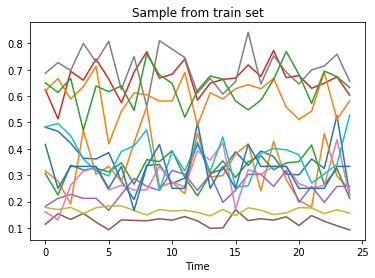

In [5]:
plt.plot(train_loader.dataset[10][0].squeeze().numpy().T);
plt.xlabel('Time')
plt.title('Sample from train set')

### GL-VAR model

In [6]:
g = GC(G_i, args.num_atoms, args.hidden_GC, 1, lag=args.lag, activation=nn.ReLU()).to(args.device)
g.load_state_dict(torch.load(os.getcwd() + '/weights_cmapss_001/g' + args.suffix + '.pt'))

/home/epineau/anaconda3/envs/edouard/lib/python3.6/site-packages/torch/cuda/__init__.py:116: UserWarning: 
    Found GPU0 Quadro K4000 which is of cuda capability 3.0.
    PyTorch no longer supports this GPU because it is too old.
    
  warnings.warn(old_gpu_warn % (d, name, major, capability[1]))


In [7]:
W_prior = torch.stack([m.layers[0].weight.squeeze(-1) for m in g.model_list])
adjacency = (W_prior.sum(-1).sum(1) != 0).float().unsqueeze(1).unsqueeze(-1)
print('Sparsity: {:.2f}'.format(adjacency.mean().item()))

Sparsity: 0.00


Epoch: 0025 mse: 1.77315 ridge: 26.37926 reg: 10.82871 sparsity: 0.14


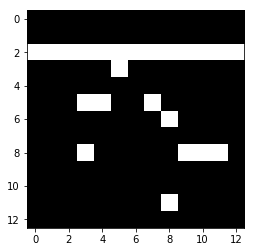

Epoch: 0050 mse: 1.76077 ridge: 26.30717 reg: 10.53608 sparsity: 0.18


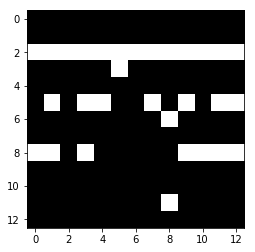

Epoch: 0075 mse: 1.84638 ridge: 26.23550 reg: 10.25589 sparsity: 0.22


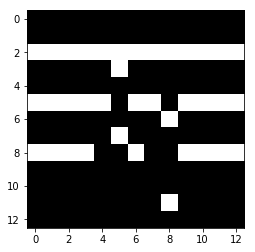

Epoch: 0100 mse: 1.82335 ridge: 26.16422 reg: 9.98348 sparsity: 0.22


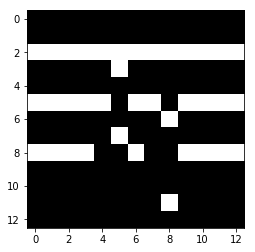

Epoch: 0125 mse: 1.79282 ridge: 26.09336 reg: 9.71121 sparsity: 0.22


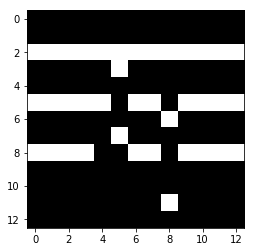

Epoch: 0150 mse: 1.74140 ridge: 26.02294 reg: 9.44280 sparsity: 0.23


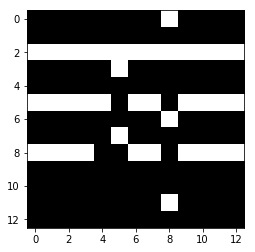

Epoch: 0175 mse: 1.82870 ridge: 25.95295 reg: 9.17454 sparsity: 0.23


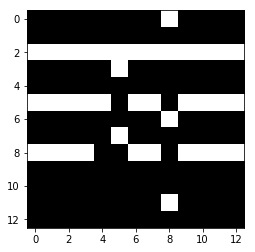

Epoch: 0200 mse: 1.85634 ridge: 25.88344 reg: 8.90627 sparsity: 0.23


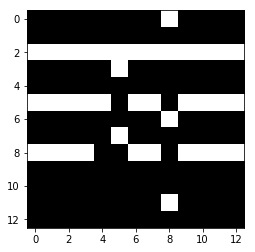

Epoch: 0225 mse: 1.93796 ridge: 25.81445 reg: 8.63881 sparsity: 0.24


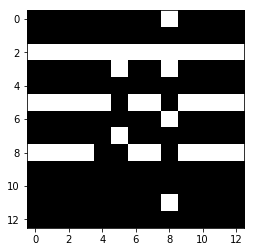

Epoch: 0250 mse: 2.14502 ridge: 25.74599 reg: 8.37262 sparsity: 0.24


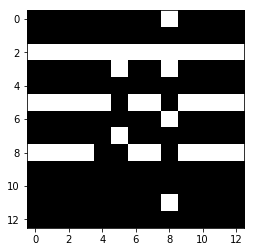

Epoch: 0275 mse: 2.03392 ridge: 25.67812 reg: 8.10663 sparsity: 0.24


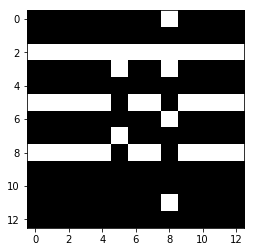

Epoch: 0300 mse: 1.92285 ridge: 25.61087 reg: 7.84350 sparsity: 0.25


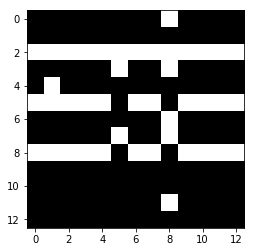

Epoch: 0325 mse: 2.25584 ridge: 25.54425 reg: 7.58402 sparsity: 0.26


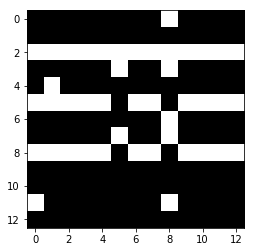

Epoch: 0350 mse: 2.27376 ridge: 25.47830 reg: 7.32786 sparsity: 0.27


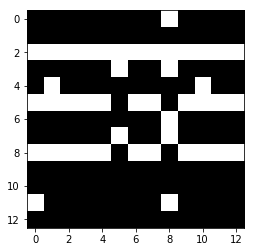

Epoch: 0375 mse: 2.45115 ridge: 25.41304 reg: 7.07331 sparsity: 0.27


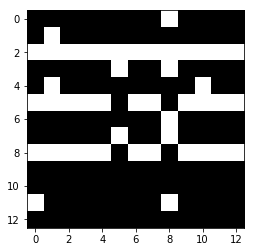

Epoch: 0400 mse: 2.33520 ridge: 25.34854 reg: 6.81953 sparsity: 0.27


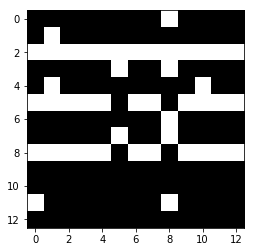

Epoch: 0425 mse: 2.24564 ridge: 25.28484 reg: 6.56574 sparsity: 0.27


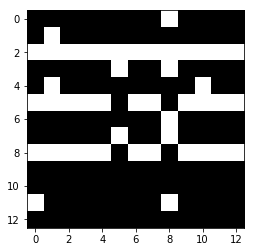

Epoch: 0450 mse: 2.52474 ridge: 25.22202 reg: 6.31386 sparsity: 0.29


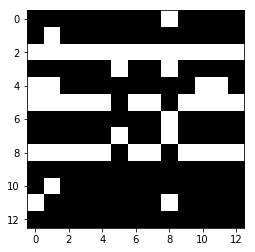

Epoch: 0475 mse: 2.70797 ridge: 25.16011 reg: 6.06917 sparsity: 0.30


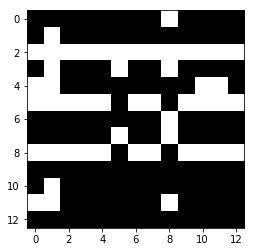

Epoch: 0500 mse: 2.77827 ridge: 25.09913 reg: 5.82923 sparsity: 0.31


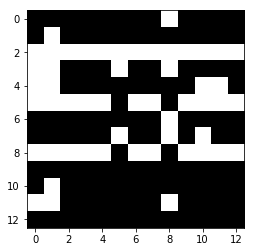

Epoch: 0525 mse: 2.71790 ridge: 25.03913 reg: 5.59308 sparsity: 0.34


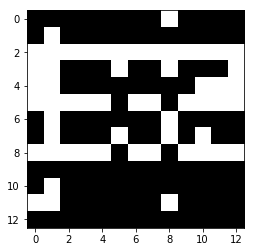

Epoch: 0550 mse: 2.95176 ridge: 24.98013 reg: 5.36659 sparsity: 0.36


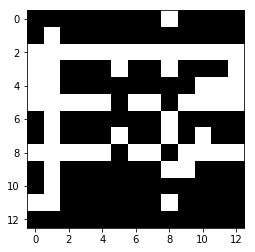

Epoch: 0575 mse: 3.08984 ridge: 24.92215 reg: 5.14171 sparsity: 0.36


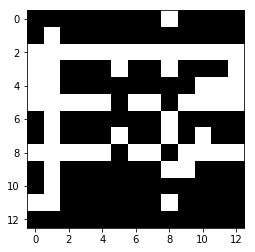

Epoch: 0600 mse: 3.11462 ridge: 24.86527 reg: 4.92157 sparsity: 0.39


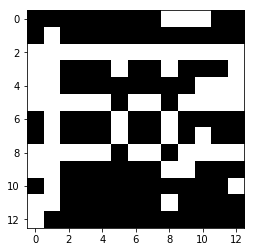

Epoch: 0625 mse: 3.26864 ridge: 24.80948 reg: 4.71518 sparsity: 0.43


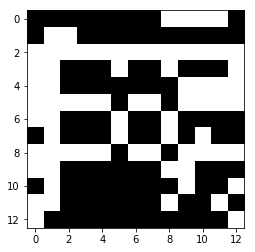

Epoch: 0650 mse: 3.71674 ridge: 24.75469 reg: 4.51973 sparsity: 0.45


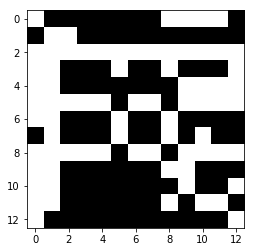

Epoch: 0675 mse: 3.00088 ridge: 24.70087 reg: 4.33122 sparsity: 0.46


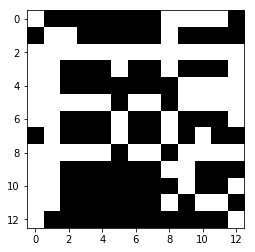

Epoch: 0700 mse: 2.99562 ridge: 24.64802 reg: 4.15337 sparsity: 0.52


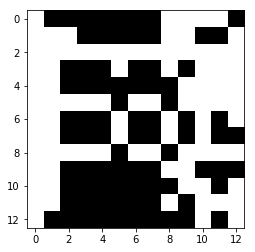

Epoch: 0725 mse: 3.68840 ridge: 24.59601 reg: 3.98763 sparsity: 0.53


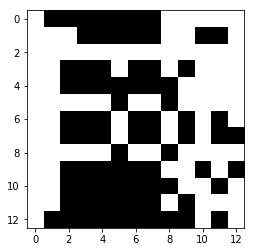

Epoch: 0750 mse: 3.18828 ridge: 24.54479 reg: 3.82985 sparsity: 0.56


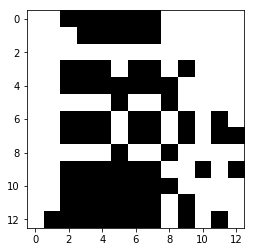

Epoch: 0775 mse: 3.08666 ridge: 24.49430 reg: 3.68008 sparsity: 0.58


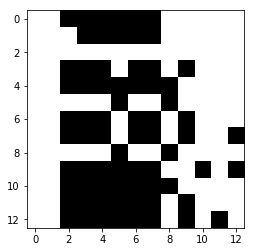

Epoch: 0800 mse: 3.34730 ridge: 24.44450 reg: 3.53763 sparsity: 0.60


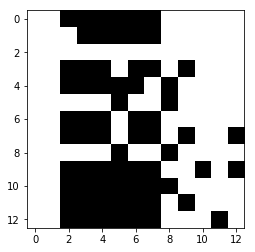

Epoch: 0825 mse: 3.46266 ridge: 24.39536 reg: 3.40120 sparsity: 0.62


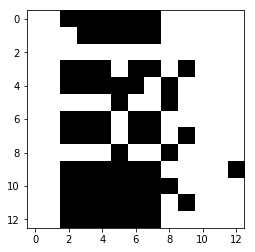

Epoch: 0850 mse: 3.97889 ridge: 24.34690 reg: 3.26709 sparsity: 0.62


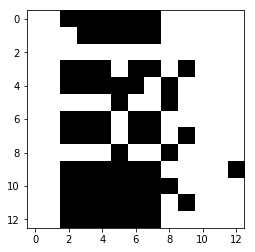

Epoch: 0875 mse: 3.49958 ridge: 24.29920 reg: 3.13497 sparsity: 0.63


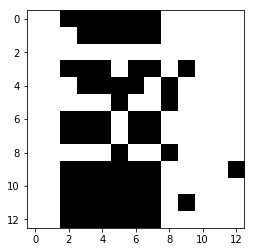

Epoch: 0900 mse: 4.29233 ridge: 24.25226 reg: 3.00910 sparsity: 0.65


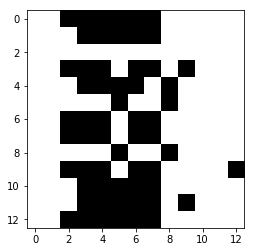

Epoch: 0925 mse: 3.62418 ridge: 24.20603 reg: 2.88941 sparsity: 0.66


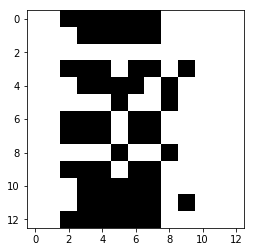

Epoch: 0950 mse: 4.12617 ridge: 24.16050 reg: 2.77111 sparsity: 0.66


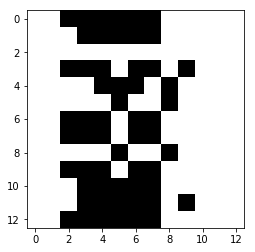

Epoch: 0975 mse: 4.49765 ridge: 24.11579 reg: 2.65444 sparsity: 0.67


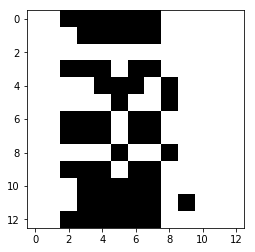

Epoch: 1000 mse: 3.73392 ridge: 24.07195 reg: 2.54385 sparsity: 0.69


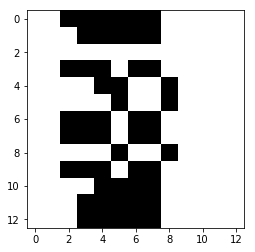

Epoch: 1025 mse: 3.92824 ridge: 24.02891 reg: 2.43954 sparsity: 0.71


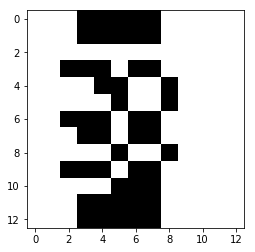

Epoch: 1050 mse: 3.54718 ridge: 23.98656 reg: 2.34213 sparsity: 0.73


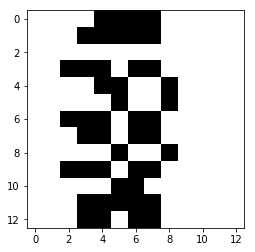

Epoch: 1075 mse: 3.60233 ridge: 23.94479 reg: 2.24867 sparsity: 0.75


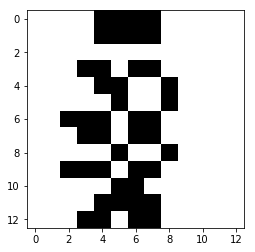

Epoch: 1100 mse: 3.71142 ridge: 23.90353 reg: 2.15997 sparsity: 0.75


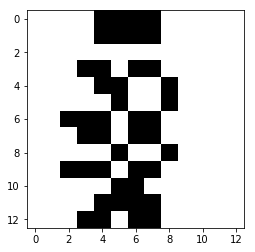

Epoch: 1125 mse: 4.83777 ridge: 23.86281 reg: 2.07333 sparsity: 0.75


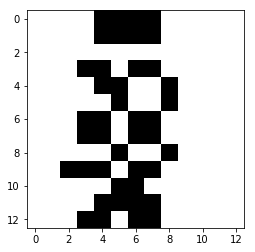

Epoch: 1150 mse: 4.02324 ridge: 23.82270 reg: 1.98673 sparsity: 0.76


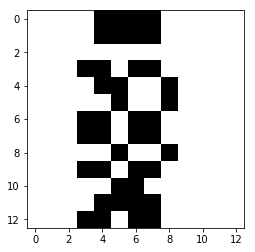

Epoch: 1175 mse: 4.14923 ridge: 23.78328 reg: 1.90216 sparsity: 0.76


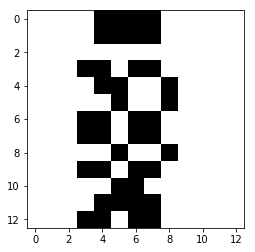

Epoch: 1200 mse: 4.59027 ridge: 23.74468 reg: 1.81986 sparsity: 0.77


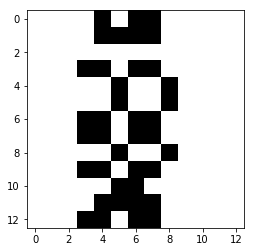

Epoch: 1225 mse: 3.67716 ridge: 23.70703 reg: 1.74040 sparsity: 0.78


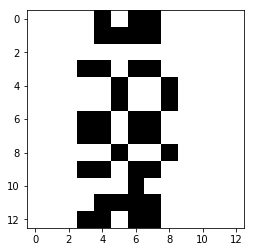

Epoch: 1250 mse: 3.80396 ridge: 23.67021 reg: 1.66391 sparsity: 0.80


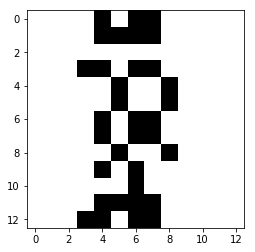

Epoch: 1275 mse: 5.30422 ridge: 23.63404 reg: 1.59625 sparsity: 0.81


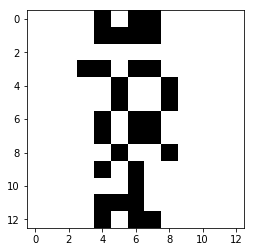

Epoch: 1300 mse: 4.19269 ridge: 23.59836 reg: 1.53204 sparsity: 0.82


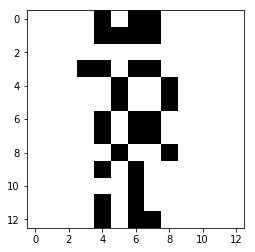

Epoch: 1325 mse: 4.29556 ridge: 23.56323 reg: 1.46876 sparsity: 0.82


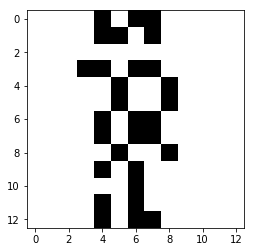

Epoch: 1350 mse: 4.44183 ridge: 23.53063 reg: 1.40981 sparsity: 0.83


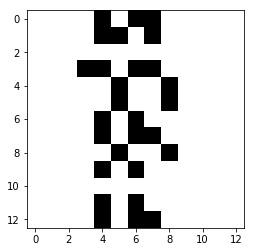

Epoch: 1375 mse: 5.20989 ridge: 23.49872 reg: 1.35205 sparsity: 0.83


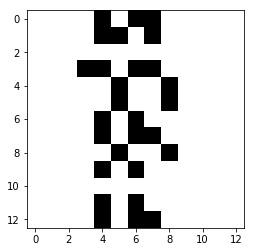

Epoch: 1400 mse: 4.41921 ridge: 23.46758 reg: 1.29452 sparsity: 0.84


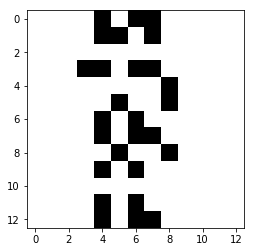

Epoch: 1425 mse: 4.50130 ridge: 23.43744 reg: 1.24003 sparsity: 0.86


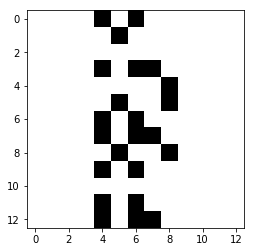

Epoch: 1450 mse: 4.33172 ridge: 23.40799 reg: 1.19542 sparsity: 0.88


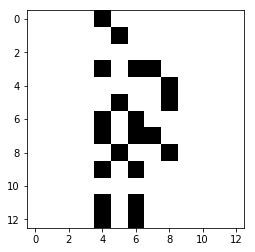

Epoch: 1475 mse: 5.25987 ridge: 23.37885 reg: 1.15210 sparsity: 0.88


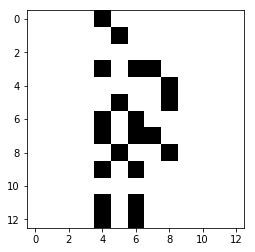

Epoch: 1500 mse: 5.46484 ridge: 23.35004 reg: 1.11060 sparsity: 0.88


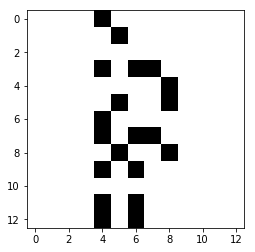

Epoch: 1525 mse: 4.05474 ridge: 23.32166 reg: 1.06934 sparsity: 0.88


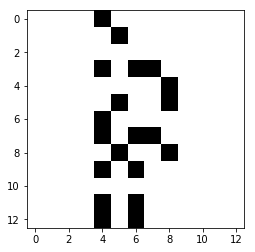

Epoch: 1550 mse: 4.17644 ridge: 23.29392 reg: 1.02945 sparsity: 0.89


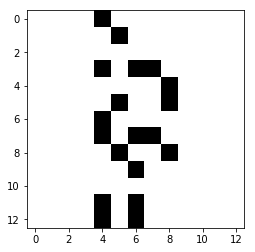

Epoch: 1575 mse: 5.52424 ridge: 23.26666 reg: 0.99040 sparsity: 0.89


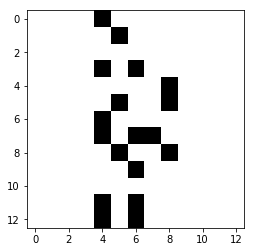

Epoch: 1600 mse: 3.99990 ridge: 23.23993 reg: 0.95326 sparsity: 0.89


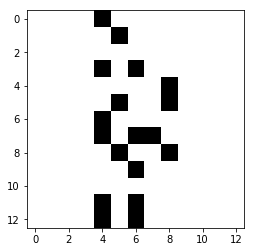

Fine tuning for saved weights
Sparsity: 0.00, loss: 0.00591
Sparsity: 0.05, loss: 0.0059
Sparsity: 0.10, loss: 0.0059
Sparsity: 0.15, loss: 0.0059
Sparsity: 0.20, loss: 0.0059
Sparsity: 0.25, loss: 0.0059
Sparsity: 0.30, loss: 0.0059
Sparsity: 0.35, loss: 0.0059
Sparsity: 0.40, loss: 0.0059
Sparsity: 0.45, loss: 0.0060
Sparsity: 0.50, loss: 0.0060
Sparsity: 0.55, loss: 0.0060
Sparsity: 0.60, loss: 0.0060
Sparsity: 0.65, loss: 0.0060
Sparsity: 0.70, loss: 0.0063
Sparsity: 0.75, loss: 0.0067
Sparsity: 0.80, loss: 0.0078
Sparsity: 0.85, loss: 0.0097
Sparsity: 0.90, loss: 0.0117


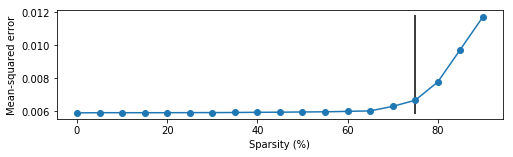

In [8]:
optimizer = optim.Adam(g.parameters())
group_lasso_training(g, optimizer, train_loader, args, plot=True)